## Import de librerías

In [10]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt

## Configuración

In [11]:
icarus_song = 'icarus_song.mp3'
sr_target = 22050 # frecuencia de remuestreo (Hz)
frame_length = 2048
hop_length = 512 # paso/solapamiento entre frames

y, sr = librosa.load(icarus_song, sr=sr_target, mono=True, duration=60) #con el mono=True evitamos perder un vector de amplitudes ya que, en audios de tipo estereo, suele tener varios canales, dando como resultado distintos vectores de amplitudes

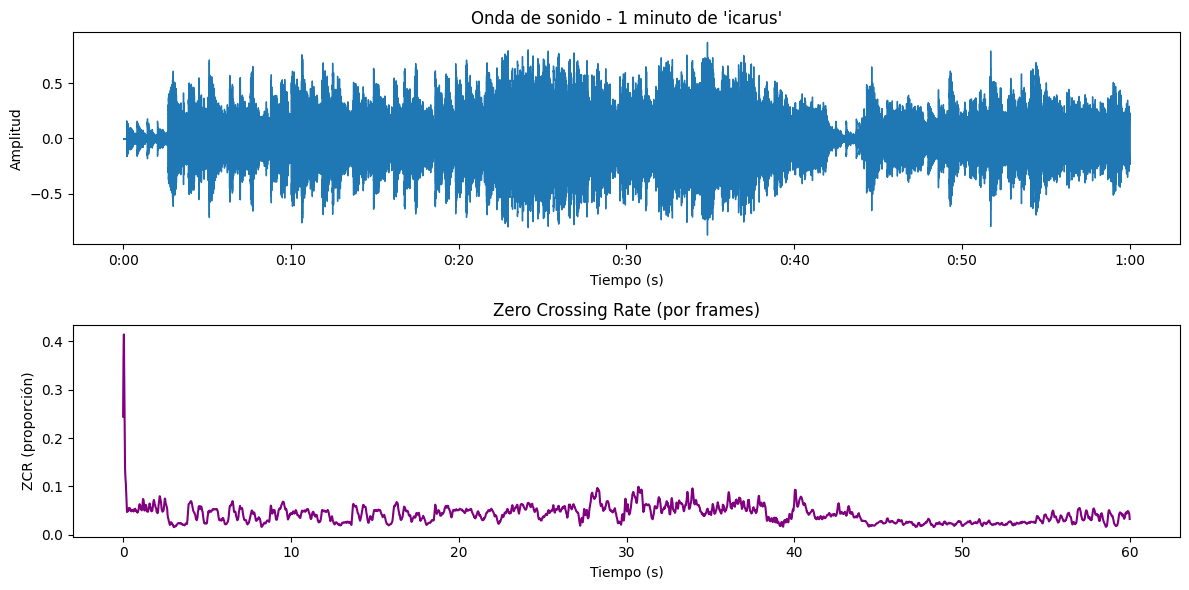

Arreglo ZCR (primeros 20 valores):
[0.24425989 0.36443576 0.41426478 0.31216414 0.2271617  0.1358085
 0.11724475 0.10649731 0.08304836 0.06595017 0.0468979  0.04738642
 0.04836346 0.04885198 0.05031754 0.05520274 0.05520274 0.05471422
 0.0542257  0.0493405 ]


In [13]:
def frame_sig(y, frame_length, hop_length, center=True):
    y = np.asarray(y, dtype=float)
    if center:
        pad = frame_length // 2
        y = np.pad(y, (pad, pad), mode='constant')
    n = len(y)
    inicio = np.arange(0, n - frame_length + 1, hop_length)
    frames = np.stack([y[i:i+frame_length] for i in inicio], axis=0) if len(inicio) > 0 else np.empty((0, frame_length))
    return frames

def zcr_per_frame(y, frame_length, hop_length, center=True):
    frames = frame_sig(y, frame_length, hop_length, center)
    if frames.size == 0:
        return np.array([])
    sign_changes = np.diff(np.signbit(frames), axis=1)
    zcr = sign_changes.sum(axis=1) / (frames.shape[1] - 1)
    return zcr

# Calcular ZCR por frames 
zcr_series = zcr_per_frame(y, frame_length, hop_length, center=True)

# Crear vector de tiempos para el ZCR (1 valor por frame)
frames = np.arange(len(zcr_series))
times = frames * hop_length / sr  

# Graficar 
plt.figure(figsize=(12, 6))

# Señal original
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Onda de sonido - 1 minuto de 'icarus'")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

# Zero Crossing Rate
plt.subplot(2, 1, 2)
plt.plot(times, zcr_series, color="purple")
plt.title("Zero Crossing Rate (por frames)")
plt.xlabel("Tiempo (s)")
plt.ylabel("ZCR (proporción)")
plt.tight_layout()
plt.show()

# Mostrar también los valores crudos de ZCR 
print("Arreglo ZCR (primeros 20 valores):")
print(zcr_series[:20])
